In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [7]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/bank.csv"
BankData = pd.read_csv(url)
BankData.head(5)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [8]:
print(BankData['y'].unique()) #you can use unique if you would like to find out how many unique attributes each variable have

['no' 'yes']


For dictionary of data please refer to https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Our goal is to define a model best predicts outcome y - success of the marketing campaign 

First let's create dummy variables for default, marital, housing, and loan

In [9]:
Default_dummy  = pd.get_dummies(BankData['default'], prefix = 'default')
del Default_dummy['default_no']

marital_dummy  = pd.get_dummies(BankData['marital'], prefix = 'marital')
del marital_dummy['marital_married']
del marital_dummy['marital_divorced']

housing_dummy  = pd.get_dummies(BankData['housing'], prefix = 'housing')
del housing_dummy['housing_no']

loan_dummy = pd.get_dummies(BankData['loan'], prefix = 'loan')
del loan_dummy['loan_no']

y_dummy = pd.get_dummies(BankData['y'], prefix = 'y')
del y_dummy['y_no']



BankData = pd.concat([BankData, marital_dummy, Default_dummy, housing_dummy, loan_dummy, y_dummy], axis=1)
print(BankData.head())
print(BankData.describe())



   age  marital  education default  balance housing loan   contact  duration  \
0   30  married    primary      no     1787      no   no  cellular        79   
1   33  married  secondary      no     4789     yes  yes  cellular       220   
2   35   single   tertiary      no     1350     yes   no  cellular       185   
3   30  married   tertiary      no     1476     yes  yes   unknown       199   
4   59  married  secondary      no        0     yes   no   unknown       226   

   campaign  pdays  previous poutcome   y  marital_single  default_yes  \
0         1     -1         0  unknown  no             0.0          0.0   
1         1    339         4  failure  no             0.0          0.0   
2         1    330         1  failure  no             1.0          0.0   
3         4     -1         0  unknown  no             0.0          0.0   
4         1     -1         0  unknown  no             0.0          0.0   

   housing_yes  loan_yes  y_yes  
0          0.0       0.0    0.0  
1     

In [10]:
BankData['Intercept'] = 1
X1 = BankData[['Intercept','age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]
y1 = BankData['y_yes']


#### Task 1: run a logistic regression using statsmodels.api

In [12]:
logit = sm.Logit(y1, X1)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.279689
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4511
Method:                           MLE   Df Model:                            9
Date:                Thu, 07 Jul 2016   Pseudo R-squ.:                  0.2173
Time:                        20:55:43   Log-Likelihood:                -1264.5
converged:                       True   LL-Null:                       -1615.5
                                        LLR p-value:                2.503e-145
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -3.2586      0.279    -11.695      0.000        -3.805    -2.712
age                0.0101      0.005      1.905      0.057        -0.000     0.021
balance         1.182e-05   1.58e-05      0.750      0.453     -1.91e-05  4.27e-05
duration           0.0038      0.000     20.782      0.000         0.003     0.004
campaign          -0.0910      0.026     -3.488      0.000        -0.142    -0.040
previous           0.1618      0.023      7.062      0.000         0.117     0.207
marital_single     0.3140      0.129      2.429      0.015         0.061     0.567
default_yes        0.3459      0.412      0.841      0.401        -0.461     1.152
housing_yes       -0.8404      0.111     -7.549      0.000        -1.059    -0.622
loan_yes          -0.8483      0.185     -4.589      0.000        -1.211    -0.486
==================================================================================
"""

#### Task 2: Interpret Campaign, marital_single, housing_yes coefficients.

Answer: 

Campaign => (keeping everything else constant) as the number of contacts with the client goes up by one, the percentage in odds of the client subscribing to a term deposit decreases by 9.10% 

marital_single => (keeping everything else constant) if the client is single, the percentage in odds of the client subscribing to a term deposit increases by 31.4% 

housing_yes => (keeping everything else constant) if the client has a housing loan, the percentage in odds of the client subscribing to a term deposit decreases by 84.83%

#### Task3: What are your 10-fold cross-validation accuracy using sklearn library and solver = 'liblinear' and solver =  'newton-cg'? (Set max_iter = 50000 if you get a warning.) What do you learn?

In [13]:
X = BankData[['age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]
y = BankData['y'] #This should be categorical - for statsmodels api that shall be 0 and 1 not necessarily '0' and '1'

In [15]:
lm = LogisticRegression(solver = 'liblinear')
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

[[  5.92678773e-03   1.12262553e-05   3.75180658e-03  -9.53399063e-02
    1.59580582e-01   2.49916961e-01   1.73238439e-01  -8.57853959e-01
   -8.23424388e-01]]
[-3.01711475]


In [16]:
lm = LogisticRegression(solver = 'newton-cg')
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

[[  1.01764759e-02   1.19324009e-05   3.78719177e-03  -9.10647277e-02
    1.61521383e-01   3.11420698e-01   2.92449864e-01  -8.30201335e-01
   -8.19488560e-01]]
[-3.2635987]


#### Construct confusion matrices for logistic regression using solver = 'liblinear' and solver = 'newton-cg'.

In [17]:
# liblinear 
from sklearn.metrics import confusion_matrix
lm = LogisticRegression(solver = 'liblinear')
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

[[  5.92678773e-03   1.12262553e-05   3.75180658e-03  -9.53399063e-02
    1.59580582e-01   2.49916961e-01   1.73238439e-01  -8.57853959e-01
   -8.23424388e-01]]
[-3.01711475]


array([[3928,   72],
       [ 426,   95]])

In [18]:
# newton-cg 
from sklearn.metrics import confusion_matrix
lm = LogisticRegression(solver = 'newton-cg')
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

[[  1.01764759e-02   1.19324009e-05   3.78719177e-03  -9.10647277e-02
    1.61521383e-01   3.11420698e-01   2.92449864e-01  -8.30201335e-01
   -8.19488560e-01]]
[-3.2635987]


array([[3923,   77],
       [ 427,   94]])

#### what did we learn from what we observerd in confusion matrices?

Answer: they are very close, liblinear predicted 5 more true positives and 1 more true negative 

#### What is your prediction for a person who is 30 years old, 1000 dollars balance,  with duration = 210 , has been contacted 3 times for this campaign (campaign = 3),  who has previously been contacted 4 times, who is single, never defaulted, home owner and doesn't have any loan?

In [19]:
# X = BankData[['age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]

x1 = [[30, 1000, 210, 3, 4, 1, 0, 1, 0]]
print(lm.predict_proba(x1))
# 9.14% probability that the client will subscribe to a term deposit

[[ 0.90862421  0.09137579]]


#### Now standardize your data - you can use standardization method used for KNN algorithms.

In [21]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

BankData['age_st'] = Standardize(BankData.age)
BankData['balance_st'] = Standardize(BankData.balance)
BankData['duration_st'] = Standardize(BankData.duration)
BankData['campaign_st'] = Standardize(BankData.campaign)
BankData['previous_st'] = Standardize(BankData.previous)
BankData['marital_single_st'] = Standardize(BankData.marital_single)
BankData['default_yes_st'] = Standardize(BankData.default_yes)
BankData['housing_yes_st'] = Standardize(BankData.housing_yes)
BankData['loan_yes_st'] = Standardize(BankData.loan_yes)

#### Use 10-fold cross validation to find the best tuning parameter - C. Use 'liblinear' and l1 penalty

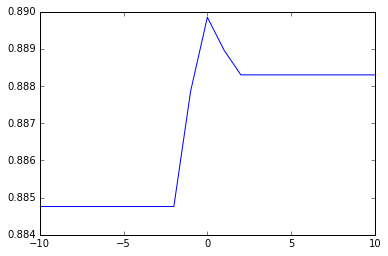

Our optimal C is 1.000000
Our accuracy at optimal C is 0.889848


In [22]:
X_st = BankData[['age_st','balance_st','duration_st','campaign_st','previous_st','marital_single_st','default_yes_st','housing_yes_st','loan_yes_st']]
y = BankData['y']

c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)

cv_scores = []

for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X_st, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

#### Localize your search around the value you found above

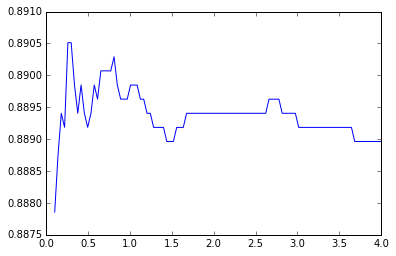

Our optimal C is 0.257576
Our accuracy at optimal C is 0.890513


In [25]:
c_list = np.linspace(0.1,4,100) 
cv_scores = []

for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X_st, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_list, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

#### Now use the best C you found above and repeat your analysis and check your coefficients

#### If you would like to drop 2 variables from your analysis, which variables are you going to choose?

Answer: 

#### Compare the results you found out above with p-values of statsmodels api. Do you have same story there? 

Answer: 